## Import required libraries

In [73]:
import os
from pathlib import Path
import uuid
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image, ImageEnhance

from skimage.color import rgb2grey
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [15]:
def sharpen(img, factor):
    enhancer_sharpness = ImageEnhance.Sharpness(img)
    return enhancer_sharpness.enhance(factor)

def contrast(img, factor):
    enhancer_contrast = ImageEnhance.Contrast(img)
    return enhancer_contrast.enhance(factor)

def color(img, factor):
    enhancer_color = ImageEnhance.Color(img)
    return enhancer_color.enhance(factor)

def rotate(img, degrees):
    return img.rotate(degrees)

def save(img, path):
    return img.save(path, "PNG")

In [4]:
def plotImages(pathList, number):
    pp = list(pathList)
    plt.figure(figsize=(15,15))
    for i in range(number):
        plt.subplot(5,5,i+1)
        im = Image.open( pp[i] )
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [5]:
inputBasePath = './Input/'
outputBasePath = './Output/'
folders = ['toddler', 'teenager', 'adults']

In [18]:
rotations = [0,90,180,270]
randContrastMin, randContrastMax = (0.9, 1.2)
randSharpenMin, randSharpenMax  = (0.9, 1.2)
randColorMin, randColorMax    = (0.9, 1.2)
multiplier = 3

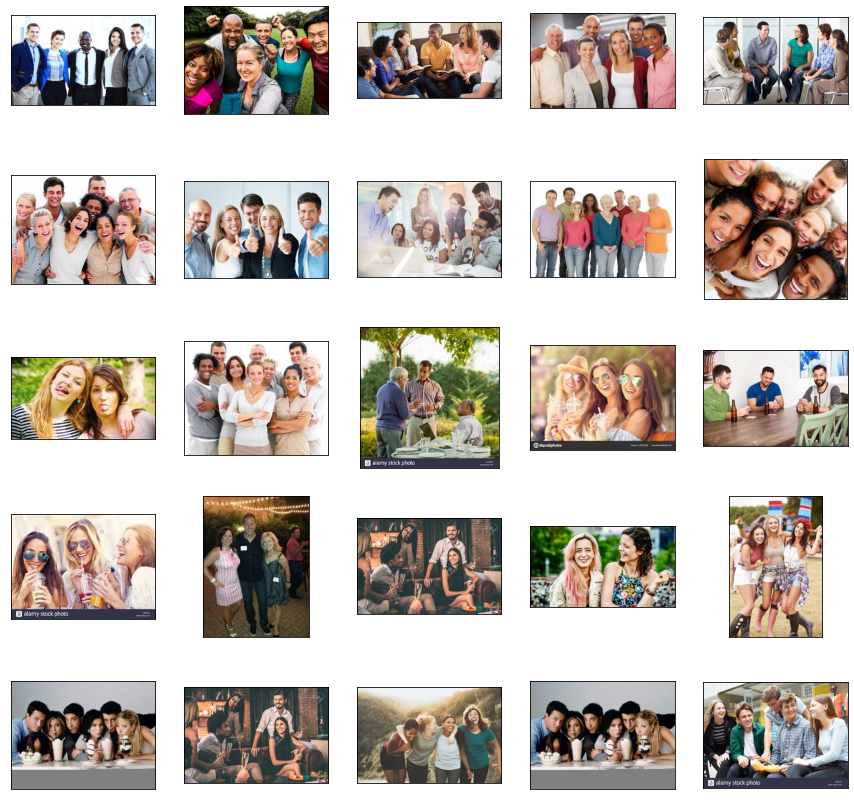

In [11]:
dp = Path(inputBasePath + 'adults' + '/').glob('*.jpg')
plotImages(dp, 25)

In [19]:
for f in folders:
    plist = Path(inputBasePath + f + '/').glob('*.jpg')

    outpath = outputBasePath + f + '/' 
    if not os.path.exists(outpath):
        os.makedirs(outpath)
    
    for path in plist:
        i = Image.open( path )

        for r in rotations:
            
            for m in range(multiplier):
                
                randContrast = random.uniform(randContrastMin, randContrastMax)
                randSharpen = random.uniform(randSharpenMin, randSharpenMax)
                randColor = random.uniform(randColorMin, randColorMax)
                
                i = rotate(i, r)
                i = contrast(i, randContrast)
                i = sharpen(i, randSharpen)
                i = color(i, randColor)
                i = i.resize((250, 220))
                
                save(i, outpath + str(uuid.uuid4()) + '.jpg') 
                print('.', end='')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

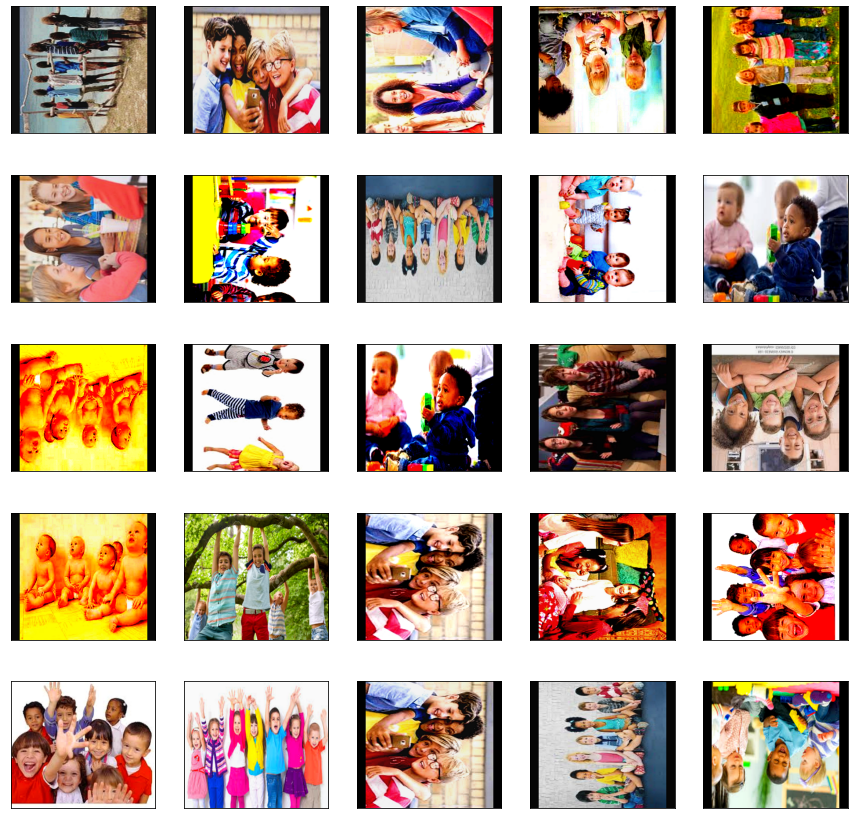

In [21]:
dp = Path(outputBasePath + 'toddler' + '/').glob('*.jpg')
plotImages(dp, 25)

In [22]:
allImages = []
for f in folders:
    for p in Path(outputBasePath + f + '/').glob('*.jpg'):
        allImages.append(str(p))

In [25]:
random.shuffle(allImages)

In [26]:
allImages

['Output\\teenager\\4ac8a606-83f7-477a-a056-ccb78351fdde.jpg',
 'Output\\toddler\\bc69a283-6b45-495b-84c1-c29c925db6ec.jpg',
 'Output\\teenager\\0c0a5d78-9161-4888-950e-5d1aad55fc40.jpg',
 'Output\\adults\\bbd88849-bcab-4c96-b755-16930de7d6cf.jpg',
 'Output\\toddler\\590e5c37-3873-4218-b352-0837c5a6b7fc.jpg',
 'Output\\teenager\\04c140b1-cb79-4f06-a67f-03abd865eea2.jpg',
 'Output\\adults\\d1b64211-56ee-44a9-b923-d40633d33da7.jpg',
 'Output\\adults\\6d5192ca-c0e4-4bf5-8466-8e3801d7b77c.jpg',
 'Output\\toddler\\1fb9e355-58b2-4a0a-9363-27955e5e8f54.jpg',
 'Output\\adults\\b9ecfb9f-1745-46ac-9965-12300755f8e2.jpg',
 'Output\\toddler\\63335975-57fc-4842-9630-8ebce9a5f5e3.jpg',
 'Output\\teenager\\2a12aad6-1241-4e82-8c50-e870543e458e.jpg',
 'Output\\adults\\2f025788-0096-45c8-852d-2feca0fa44d3.jpg',
 'Output\\adults\\0a4882e3-5315-4a9a-a1e9-0c73672b835f.jpg',
 'Output\\toddler\\4db78b79-cbaf-4930-b2e9-229ad1ea9843.jpg',
 'Output\\adults\\76fe5ebd-12a8-4989-a708-321f7d514c49.jpg',
 'Output\\t

In [27]:
f = open("./Output/Impdata.csv", "w+")
x = 0
for i in allImages:
    x = x + 1
    if 'toddler' in i:
        f.write("0,%s\n" % (i[7:]))
    elif 'teenager' in i:
        f.write("1,%s\n" % (i[7:]))
    else:
        f.write("2,%s\n" % (i[7:]))
f.close()

In [41]:
first = pd.read_csv('./Output/Impdata.csv', header=None)

In [42]:
first.head()

,0,1
0,1,teenager\4ac8a606-83f7-477a-a056-ccb78351fdde.jpg
1,0,toddler\bc69a283-6b45-495b-84c1-c29c925db6ec.jpg
2,1,teenager\0c0a5d78-9161-4888-950e-5d1aad55fc40.jpg
3,2,adults\bbd88849-bcab-4c96-b755-16930de7d6cf.jpg
4,0,toddler\590e5c37-3873-4218-b352-0837c5a6b7fc.jpg


In [45]:
first = first.rename(columns={0: "Label", 1: "Image"})

In [46]:
first

,Label,Image
0,1,teenager\4ac8a606-83f7-477a-a056-ccb78351fdde.jpg
1,0,toddler\bc69a283-6b45-495b-84c1-c29c925db6ec.jpg
2,1,teenager\0c0a5d78-9161-4888-950e-5d1aad55fc40.jpg
3,2,adults\bbd88849-bcab-4c96-b755-16930de7d6cf.jpg
4,0,toddler\590e5c37-3873-4218-b352-0837c5a6b7fc.jpg
...,...,...
1063,0,toddler\59276563-ca06-46e3-b48b-ec13eae83c38.jpg
1064,2,adults\5ded882c-eb6a-463a-a3d3-4ba7c7bb5bb5.jpg
1065,0,toddler\cbb94622-a0c1-4220-b322-8e13982b527b.jpg
1066,2,adults\7207a5cd-7a99-42bf-917f-788e01eafe89.jpg


In [51]:
first = first[['Image','Label']]

In [52]:
first

,Image,Label
0,teenager\4ac8a606-83f7-477a-a056-ccb78351fdde.jpg,1
1,toddler\bc69a283-6b45-495b-84c1-c29c925db6ec.jpg,0
2,teenager\0c0a5d78-9161-4888-950e-5d1aad55fc40.jpg,1
3,adults\bbd88849-bcab-4c96-b755-16930de7d6cf.jpg,2
4,toddler\590e5c37-3873-4218-b352-0837c5a6b7fc.jpg,0
...,...,...
1063,toddler\59276563-ca06-46e3-b48b-ec13eae83c38.jpg,0
1064,adults\5ded882c-eb6a-463a-a3d3-4ba7c7bb5bb5.jpg,2
1065,toddler\cbb94622-a0c1-4220-b322-8e13982b527b.jpg,0
1066,adults\7207a5cd-7a99-42bf-917f-788e01eafe89.jpg,2


In [81]:
labels = first['Label']

In [55]:
def get_image(row_id, root = './Output/'):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

In [74]:
def create_features(img):
   
    # convert image to greyscale
    grey_image = rgb2grey(img)
    return grey_image

In [75]:
ss = StandardScaler()

def create_feature_matrix(label_dataframe):
    features_list = []
    
    for Image in label_dataframe['Image']:
        # load image 
        img = get_image(Image)
        # get features for image
        image_features = create_features(img)
        image_features = ss.fit_transform(image_features)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
dataset_matrix = create_feature_matrix(first)

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWa

In [79]:
dataset_matrix[1].shape

(220, 250)

In [82]:
X_train , X_test, y_train, y_test = train_test_split(dataset_matrix, labels, test_size=.25 ,random_state= 4)

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(220, 250)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [85]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
history = model.fit(X_train, y_train, epochs=25)

Train on 801 samples
Epoch 1/25
801/801 [==============================] - 6s 7ms/sample - loss: 4.0978 - accuracy: 0.5356
Epoch 2/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.6168 - accuracy: 0.8789
Epoch 3/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.4234 - accuracy: 0.9376
Epoch 4/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.1143 - accuracy: 0.9800
Epoch 5/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.1733 - accuracy: 0.9613
Epoch 6/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.1051 - accuracy: 0.9888
Epoch 7/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.0405 - accuracy: 0.9900
Epoch 8/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.0351 - accuracy: 0.9913
Epoch 9/25
801/801 [==============================] - 4s 5ms/sample - loss: 0.0128 - accuracy: 0.9963
Epoch 10/25
801/801 [==============================] - 4s 5ms

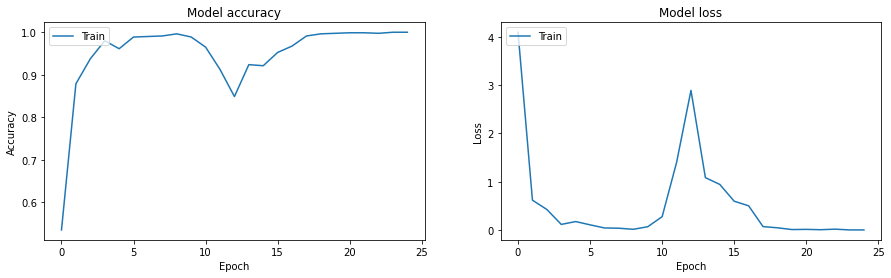

In [88]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [89]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

267/267 [==============================] - 0s 1ms/sample - loss: 1.3632 - accuracy: 0.9513
Test accuracy: 0.9513109


In [90]:
y_pred = model.predict_classes(X_test)

In [91]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average='micro')

0.951310861423221

In [92]:
test_file = pd.read_csv('./Output/Test.csv', index_col =0)

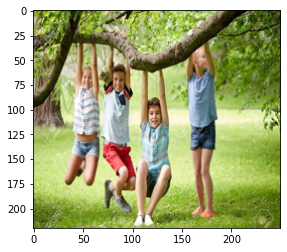

In [123]:
def get_imagee(row_id, root="./Output/Test Data/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    img = img.resize((250,220))
    return np.array(img)

# subset the dataframe to just Apis (genus is 0.0) get the value of the sixth item in the index
apis_row = test_file.index[5]
tt = get_imagee(apis_row)
# show the corresponding image of an Apis
plt.imshow(get_imagee(apis_row))
plt.show()

In [124]:
tt.shape

(220, 250, 3)

In [125]:
bombus = get_imagee(apis_row)

def create_featuress(img):
    
    grey_image = rgb2grey(img)
    return grey_image

bombus_features = create_featuress(bombus)

# print shape of bombus_features
print(bombus_features.shape)

(220, 250)


C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """


In [126]:
def create_feature_matrixx(label_dataframe):
    features_list = []
    
    for Filename in label_dataframe.index:
        # load image
        img = get_imagee(Filename)
        # get features for image
        image_features = create_featuress(img)
        image_features = ss.fit_transform(image_features)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
test_feature_matrix = create_feature_matrixx(test_file)

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """
C:\Users\Rohit\anaconda3\envs\tenso

In [127]:
test_feature_matrix

array([[[ 0.05575889, -0.48501044, -0.76482325, ...,  1.76924368,
          1.6244197 ,  1.48552614],
        [ 0.24312669,  0.00599399, -1.00248021, ...,  2.11863385,
          2.06700715,  2.00727013],
        [ 0.42058305,  0.24987447, -0.85735391, ...,  2.14233473,
          2.16183948,  2.17125079],
        ...,
        [-1.13061366, -1.18057384, -1.14061507, ..., -0.98812609,
         -0.95744073, -0.87691326],
        [-1.13228723, -1.18219333, -1.14217281, ..., -0.98812609,
         -0.95744073, -0.87691326],
        [-1.13228723, -1.18219333, -1.14217281, ..., -0.98812609,
         -0.95744073, -0.87691326]],

       [[ 1.47588799,  1.53663494,  1.60378234, ...,  1.43749449,
          1.46309302,  1.46658707],
        [ 1.48212686,  1.55348433,  1.61976148, ...,  1.43749449,
          1.46309302,  1.46658707],
        [ 1.42541334,  1.48583263,  1.55235235, ...,  1.45075698,
          1.4764111 ,  1.47975929],
        ...,
        [-1.41498476, -1.37193933, -1.34072844, ..., -

In [130]:
final_predict = model.predict_classes(test_feature_matrix)

In [131]:
submission = pd.DataFrame({'Category': final_predict})

In [132]:
submission.to_csv(r"C:\Users\Rohit\datacamp projects\Hackerearth ML\Output\submission.csv", index=False)